## Producto Interior Bruto (PIB)

Porcentaje de variación del PIB anual de Mexico

- DataFrame --> df_PIB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root = 'Tipo de cambio- Dolar a Euro.csv'

df = pd.read_csv(root)
df.head()

,Unnamed: 0,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Tipo de cambio,0.8894,0.8027,0.7467,0.7921,0.9135,0.8526,0.9926,1.0611,1.1225,...,0.7727,0.7577,0.7274,0.8264,0.9207,0.9507,0.8333,0.8717,0.8917,0.8185


In [3]:
df.rename(columns={'Unnamed: 0' : 'variables'}, inplace=True)

In [4]:
df= df.replace({'Tipo de cambio': 'PIB'})

In [5]:
def limpieza_indicadores(root):
    "limpieza del fichero inicial de cada indicador económico. Base de datos del Banco Mundial"
    
    df = pd.read_csv(root, header=0)
    df.rename(columns={'Country Name':'country', 'Indicator Name':'variables' }, inplace=True)
    df = df[df.country == 'México']
    df['country'] = df['country'].replace('México', 'MEXICO')
    df = df.drop(['country', 'Country Code', 'Indicator Code'], axis=1)
    
    
    return df

In [6]:
root_PIB = "Variables_economicas/PIB_total.csv"
df_PIB = limpieza_indicadores(root_PIB)
df_PIB = df_PIB.round(2)
df_PIB = df_PIB.replace({'PIB (US$ a precios actuales)': 'PIB'})
df_PIB.set_index('variables', inplace=True)

df_PIB.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
PIB,5.007361e+11,5.278132e+11,3.600739e+11,4.109756e+11,5.004135e+11,5.265021e+11,6.002329e+11,7.079067e+11,7.567063e+11,7.721064e+11,...,1.180490e+12,1.201090e+12,1.274443e+12,1.315351e+12,1.171868e+12,1.078491e+12,1.158913e+12,1.222349e+12,1.268871e+12,NaN


In [7]:
df_PIB = df_PIB.transpose()

In [14]:
df_PIB = df_PIB.div(1000000)
df_PIB.head()

variables,PIB
1993,500736.065605
1994,527813.238126
1995,360073.909244
1996,410975.595310
1997,500413.483109


In [26]:
df_PIB_total = df_PIB.round(2)

In [27]:
df_PIB_total.head()

variables,PIB
1993,500736.07
1994,527813.24
1995,360073.91
1996,410975.60
1997,500413.48


In [19]:
df_PIB.describe()

variables,PIB
count,2.700000e+01
mean,8.896409e+05
std,2.990275e+05
min,3.600739e+05
25%,6.540698e+05
50%,9.000453e+05
75%,1.165390e+06
max,1.315351e+06


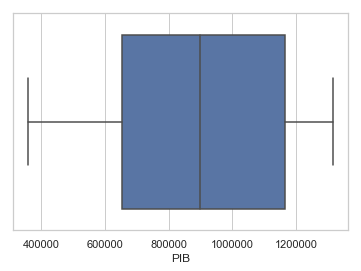

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_PIB["PIB"])

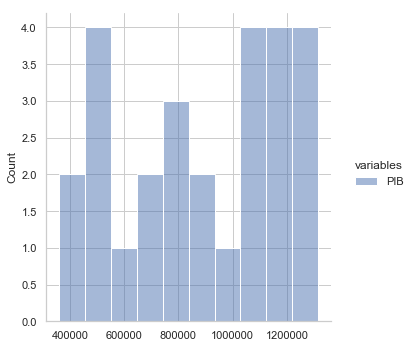

In [21]:
sns.displot(df_PIB, bins=10)

Text(0.5, 1.0, 'Evolución del PIB en México')

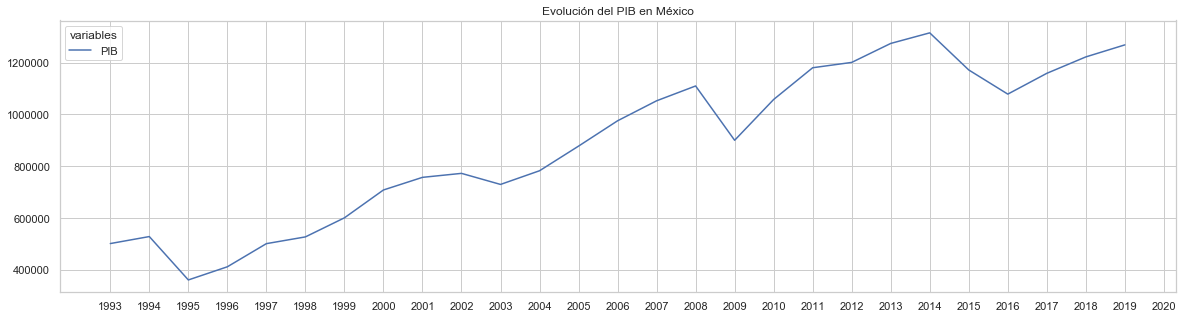

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_PIB)
plt.title('Evolución del PIB en México')

In [23]:
df_PIB.loc[df_PIB['PIB'] == df_PIB['PIB'].max()]

variables,PIB
2014,1315351.18


In [25]:
df_PIB.loc[df_PIB['PIB'] == df_PIB['PIB'].min()]

variables,PIB
1995,360073.91


In [28]:
%store df_PIB_total

Stored 'df_PIB_total' (DataFrame)
